--- Data Preview (Head) ---
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Overall Accuracy: 100.00%

--- Performance Metrics Table ---
          Class  Precision  Recall  Specificity  F1 Score  NPV
    Iris-setosa        1.0     1.0          1.0       1.0  1.0
Iris-versicolor        1.0     1.0          1.0       1.0  1.0
 Iris-virginica        1.0     1.0          1.0       1.0  1.0


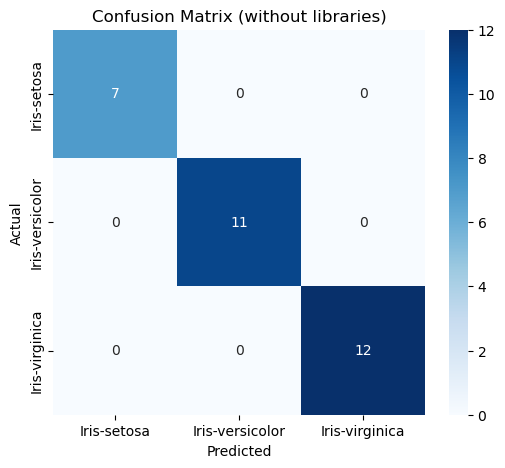

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Custom KNN Class ---
class KNN_Scratch:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        preds = [self._predict_one(x) for x in X_test]
        return np.array(preds)
    
    def _predict_one(self, x):
        # Euclidean Distance
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        # Get k nearest indices
        k_indices = np.argsort(distances)[:self.k]
        # Get labels
        k_labels = [self.y_train[i] for i in k_indices]
        # Majority Vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

# 1. Load and Preview Data
df = pd.read_csv('iris.csv')
print("--- Data Preview (Head) ---")
print(df.head())

# 2. Manual Split (Shuffle then Split)
data = df.values
np.random.seed(42)
np.random.shuffle(data)

split_idx = int(len(data) * 0.8)
train_data, test_data = data[:split_idx], data[split_idx:]

X_train = train_data[:, :-1].astype(float)
y_train = train_data[:, -1]
X_test = test_data[:, :-1].astype(float)
y_test = test_data[:, -1]

# 3. Train & Predict
knn_custom = KNN_Scratch(k=3)
knn_custom.fit(X_train, y_train)
y_pred = knn_custom.predict(X_test)

# 4. Manual Confusion Matrix & Metrics
classes = np.unique(np.concatenate((y_train, y_test)))
cm = np.zeros((len(classes), len(classes)), dtype=int)
class_map = {label: idx for idx, label in enumerate(classes)}

# Fill Confusion Matrix
for t, p in zip(y_test, y_pred):
    cm[class_map[t], class_map[p]] += 1

metrics_list = []
for i, cls in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics_list.append([cls, precision, recall, specificity, f1, npv])

metrics_df = pd.DataFrame(metrics_list, columns=['Class', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'NPV'])
accuracy = np.sum(y_pred == y_test) / len(y_test)

print(f"\nOverall Accuracy: {accuracy*100:.2f}%")
print("\n--- Performance Metrics Table ---")
print(metrics_df.round(4).to_string(index=False))

# 5. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (without libraries)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()